Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: rowwise* >left is a 3x4 matrix but right is a 4x1 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: * >left is a 3x1 matrix but right is a 4x20 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: rowwise* >left is a 3x20 matrix but right is a 20x1 matrix


[[-0.95600607  1.06018369 -0.99193644 -0.48510705 -0.61546259 -1.64962564
  -0.72597504 -1.20516168  0.06007893 -0.30609922  0.51326932  0.76428604
  -0.39592918  1.79036935 -1.02746476 -0.16684863  0.7169402   0.14841721
  -0.97659671 -0.87623671]
 [ 1.40095459  1.33865336 -0.35397929  0.37398137 -0.16413566  0.90055873
  -0.89276971 -1.5005856  -0.73785016  0.68649346 -1.10857112 -0.40951671
   0.58055581  1.67674817  0.16641075 -0.4916119   1.00357296  0.5795095
  -1.17070656  0.25816733]
 [ 0.99677965  0.339659   -0.56901002  0.33576238 -0.93784476 -0.7593892
   0.62495459 -0.55690885 -0.65946545 -0.94280935 -1.14286637  0.29718912
  -0.61443647  0.02738703 -0.16985228 -1.00354158  0.21576482 -0.91880854
  -0.15622843 -0.13212282]]
[[-1.41027324]
 [ 0.69956125]
 [-0.007381  ]
 [-0.28584832]
 [-0.477902  ]
 [ 1.07422843]
 [ 0.27296185]
 [-1.05699417]
 [ 0.66883187]
 [ 0.21658944]
 [ 0.87449652]
 [-0.97260206]
 [-0.24196932]
 [ 1.34358628]
 [ 0.15775267]
 [-0.61072621]
 [ 0.77664297]

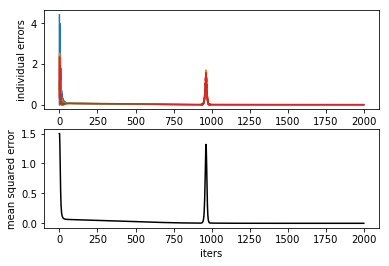

In [1]:
import numpy as np
import pyCalc as p
import random

np.random.seed(1)

p.setMode("quiet")

xs = p.constant(np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ]                           
                               , dtype= float))
#ys = p.constant(np.array([0,1,1,0], dtype=float)) #AxorB
ys = p.constant(np.array([0,1,1,1], dtype=float)) #(AorB) and C

weights = 2*np.random.random((3,20)) - 1
weights2 = 2*np.random.random((20,1)) - 1

ws0 = p.variable(3,20)
ws1 = p.variable(20,1)


l0 = p.function(xs, ws0, "*")
l1 = p.function(l0, "sigmoid")
l2 = p.function(l1,ws1, "*")

l2_error = p.function(ys.T(), l2, "-") 
tmp1 = p.function(l2_error.T(), l1, "*").T()

sig0 = l1.deriv()
l2_errorh = p.function(xs.T(), l2_error, "rowwise*")
l1_delta = p.function(l2_errorh,sig0, "*")
tmp0 = p.function(l1_delta,ws1, "rowwise*") 
g= []
g2= []
for i in range(2000):
    t1 = weights2 + 0.1*tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
    t0 = weights + 0.1*tmp0.value(dict([(ws0,weights), (ws1,weights2)]))
    weights = t0
    weights2 = t1
    g.append([[bb*bb for bb in d] for d in l2_error.value(dict([(ws0,weights), (ws1,weights2)])).tolist()])
    g2.append(sum([ bb*bb for bb in l2_error.value(dict([(ws0,weights), (ws1,weights2)]))])/4)

              
print(weights)
print(weights2)
import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[g[j][i] for j in range(len(g))]for i in range(len(g[0]))]



plt.figure(1)
plt.subplot(211)
plt.ylabel('individual errors')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.subplot(212)
plt.ylabel('mean squared error')
plt.xlabel('iters')
plt.plot(x_data, g2, 'k')
plt.show()

In [2]:
l2.value(dict([(ws0,weights), (ws1,weights2)]))

array([[  3.99257313e-04],
       [  9.99503354e-01],
       [  9.99531805e-01],
       [  1.00058374e+00]])

Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: rowwise* >left is a 3x4 matrix but right is a 4x1 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: * >left is a 3x1 matrix but right is a 4x20 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: rowwise* >left is a 3x20 matrix but right is a 20x1 matrix


[[ -2.33387529e-01   4.54549103e-01  -1.03601704e+00   1.48570771e-01
   -1.43136757e+00  -2.40858753e-02  -8.78473592e-03  -3.05510452e-01
   -2.85587055e-01   2.18098481e+00  -1.82699608e-01   6.99221780e-01
   -1.24351459e+00   4.12268640e+00  -1.63169184e+00   2.78959601e-01
    1.59024662e+00  -1.35044049e-01  -7.91665548e-01   2.59791427e-01]
 [  4.82652596e-01   5.19749830e-01  -4.43920198e-01   3.82072272e-01
    7.49777225e-01   1.03163473e+00  -4.75946522e-01  -9.16317646e-01
   -8.22179826e-01   1.05402461e+00  -8.44118525e-01  -1.73338964e-01
    7.75664200e-01   4.66427452e-01   3.35587668e-01  -2.03444510e-01
    6.63242588e-01   5.09908167e-01  -1.11018239e+00   6.28939892e-01]
 [  8.07480633e-01  -3.51115450e-01  -5.44403337e-01   2.95071133e-02
   -7.46707892e-02  -4.10607070e-01   9.06426276e-01  -4.04994222e-01
   -6.69008649e-01  -2.24781500e+00  -1.02180183e+00  -2.22014153e-03
   -2.04554398e-01  -3.03516444e+00   5.73280223e-01  -5.00251035e-01
   -1.02692034e+00

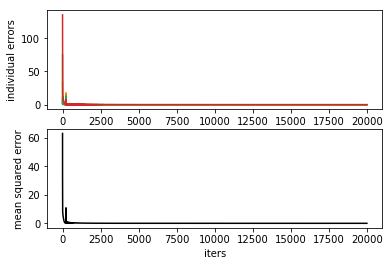

In [3]:
import numpy as np
import pyCalc as p
import random

np.random.seed(1)

p.setMode("quiet")

xs = p.constant(np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6] ]                           
                               , dtype= float))
ys = p.constant(np.array([6,9,12,15], dtype=float))

weights = 2*np.random.random((3,20)) - 1
weights2 = 2*np.random.random((20,1)) - 1

ws0 = p.variable(3,20)
ws1 = p.variable(20,1)


l0 = p.function(xs, ws0, "*") #4x20
l1 = p.function(l0, "sigmoid") #4x20
#l10 = p.function(l1,ws1, "*") #4x1
#l2 = p.function(l10, "sigmoid")
l2 = p.function(l1,ws1, "*")

l2_error = p.function(ys.T(), l2, "-") 
tmp1 = p.function(l2_error.T(), l1, "*").T()

sig0 = l1.deriv()
l2_errorh = p.function(xs.T(), l2_error, "rowwise*")
l1_delta = p.function(l2_errorh,sig0, "*")
tmp0 = p.function(l1_delta,ws1, "rowwise*") 
g= []
g2= []
for i in range(20000):
    t1 = weights2 + 0.01*tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
    t0 = weights + 0.01*tmp0.value(dict([(ws0,weights), (ws1,weights2)]))
    weights = t0
    weights2 = t1
    g.append([[bb*bb for bb in d] for d in l2_error.value(dict([(ws0,weights), (ws1,weights2)])).tolist()])
    g2.append(sum([ bb*bb for bb in l2_error.value(dict([(ws0,weights), (ws1,weights2)]))])/4)

              
print(weights)
print(weights2)
import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[g[j][i] for j in range(len(g))]for i in range(len(g[0]))]



plt.figure(1)
plt.subplot(211)
plt.ylabel('individual errors')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.subplot(212)
plt.ylabel('mean squared error')
plt.xlabel('iters')
plt.plot(x_data, g2, 'k')
plt.show()

In [4]:
l2.value(dict([(ws0,weights), (ws1,weights2)]))

array([[  6.00738198],
       [  9.01035547],
       [ 12.01797773],
       [ 15.01875656]])